# Project: Wrangling and Analyze Data

In [1]:
# Import neccesary libraries and modules that will be used in the notebook

import pandas as pd
import requests
import os
import numpy as np
import tweepy
import json
from timeit import default_timer as timer
from datetime import timedelta
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from PIL import Image
from io import BytesIO
from wordcloud import WordCloud
import random

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
folder_name = 'C:/Users/Zion/Documents/Udacity_Wrangling'

    
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [4]:
image_predict = pd.read_csv('image-predictions.tsv', sep= '\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
auth = tweepy.OAuth2BearerHandler("MY_BEARER_TOKEN")

api = tweepy.API(auth, wait_on_rate_limit = True)

In [ ]:
tweets_text = 'tweet_json.txt'
count_true = 0
count_error = 0
id_error = []

start = time.time()

with open(tweets_text, 'w') as file:
    for id_of_tweet in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(id_of_tweet, tweet_mode='extended')
            json.dump(tweet._json, file)
            file.write('\n')
            count_true += 1
        except tweepy.TweepyException as e:
            count_error += 1
            id_error.append(id_of_tweet)
            continue

end = timer()

print('Successfully scrapped tweets are:' + str(count_true))
print('Unsuccessfully scrapped tweets are:' + str(count_error))
print(timedelta(seconds=end-start))

This will take about 20 - 30 minutes

In [5]:
# Load tweet data from JSON file

tweets = []
for line_of_tweet in open('tweet_json.txt', 'r'):
     tweets.append(json.loads(line_of_tweet))

In [6]:
# Load into dataframe

tweets_df = pd.DataFrame.from_dict(tweets)
tweets_df = tweets_df[['id', 'retweet_count', 'favorite_count']]

---
## Assessing Data




General overview of the 3 datasets

In [7]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
image_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
tweets_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,6979,33728
1,892177421306343426,5280,29254
2,891815181378084864,3466,21987
3,891689557279858688,7198,36823
4,891327558926688256,7723,35207


---

####  Accessing twitter_archive dataframe

In [10]:
twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [14]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [15]:
# Check retweets
twitter_archive[twitter_archive.retweeted_status_id.isna() != True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [16]:
# Names are usually in title case i.e first letter capitalised except compound names
twitter_archive[
    (~(twitter_archive.name.str.istitle() == True)) | (twitter_archive.name.str.islower() == True)].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'mad',
       'an', 'very', 'just', 'DonDon', 'my', 'his', 'actually', 'getting',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'CeCe', 'the',
       'by', 'officially', 'life', 'light', 'space', 'JD', 'DayZ'],
      dtype=object)

In [17]:
# To catch invalid names which which will most probably be less than 4 and do not start lower case
twitter_archive[twitter_archive.name.str.len() < 4].name.unique()

array(['Jax', 'Ted', 'Jim', 'Gus', 'Rey', 'a', 'Aja', 'Jed', 'Leo', 'Ken',
       'Max', 'Ava', 'Eli', 'Ash', 'not', 'Mia', 'one', 'Ike', 'Mo', 'Bo',
       'Tom', 'Alf', 'Sky', 'Tyr', 'Moe', 'Sam', 'Ito', 'Doc', 'mad',
       'Jay', 'Mya', 'an', 'O', 'Al', 'Lou', 'my', 'Eve', 'Dex', 'Ace',
       'Zoe', 'Blu', 'his', 'all', 'Sid', 'old', 'Ole', 'Bob', 'the',
       'Obi', 'by', 'Evy', 'Tug', 'Jeb', 'Dot', 'Mac', 'Ed', 'Taz', 'Cal',
       'JD', 'Pip', 'Amy', 'Gin', 'Edd', 'Ben', 'Dug', 'Jo', 'Ron', 'Stu'],
      dtype=object)

In [18]:
# Display full texts of tweets with such names
with pd.option_context('display.max_colwidth', None):
    display(twitter_archive[twitter_archive.name.isin(
        ['not','one','mad','an','my','his','old','all','the','by']) == True])

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-announces-its-first-ever-ark-oasis-animal-terminal-001480161.html?sbdht=_pM1QUzk3wsdTxcmMoRPV7FWYYlsNKcFRcYSY7OmeHnOXA4NtUM6PLQ2_,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1",14,10,one,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Say hello to mad pupper. You know what you did. 13/10 would pet until no longer furustrated https://t.co/u1ulQ5heLX,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/v/iEggaEOiLO3",13,10,mad,None,None,pupper,None
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,"https://twitter.com/dog_rates/status/703041949650034688/photo/1,https://twitter.com/dog_rates/status/703041949650034688/photo/1",10,10,an,None,None,None,None
852,765395769549590528,NaN,NaN,2016-08-16 03:52:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765395769549590528/photo/1,13,10,my,None,None,None,None
924,755206590534418437,NaN,NaN,2016-07-19 01:04:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is one of the most inspirational stories I've ever come across. I have no words. 14/10 for both doggo and owner https://t.co/I5ld3eKD5k,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/755206590534418437/photo/1,https://twitter.com/dog_rates/status/755206590534418437/photo/1,https://twitter.com/dog_rates/status/755206590534418437/photo/1,https://twitter.com/dog_rates/status/755206590534418437/photo/1",14,10,one,doggo,None,None,None
988,748977405889503236,NaN,NaN,2016-07-01 20:31:43 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",What jokester sent in a pic without a dog in it? This is not @rock_rates. This is @dog_rates. Thank you ...10/10 https://t.co/nDPaYHrtNX,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748977405889503236/photo/1,10,10,not,None,None,None,None
992,748692773788876800,NaN,NaN,2016-07-01 01:40:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",That is Quizno. This is his beach. He does not tolerate human shenanigans on his beach. 10/10 reclaim ur land doggo https://t.co/vdr7DaRSa7,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748692773788876800/photo/1,10,10,his,doggo,None,None,None
993,748575535303884801,NaN,NaN,2016-06-30 17:54:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is on

In [19]:
# Display tweet of dogs named O
twitter_archive[twitter_archive.name == 'O']['text']

775    This is O'Malley. That is how he sleeps. Doesn...
Name: text, dtype: object

In [20]:
# Display tweet of dogs named a
with pd.option_context('display.max_colwidth', None):    
    display(twitter_archive[twitter_archive.name == 'a'])

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1",13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1",10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/747885874273214464/photo/1,https://twitter.com/dog_rates/status/747885874273214464/photo/1",8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/746872823977771008/photo/1,https://twitter.com/dog_rates/status/746872823977771008/photo/1",11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593470234624/photo/1,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687239008257/photo/1,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a taco. We only rate dogs. Please o

Some names that have 'a' as their values sill have the dog's name in the text. They are mostly in the format
"This is a _noun that isn't a dog name_."

In [21]:
twitter_archive.name.value_counts().head(10)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Name: name, dtype: int64

In [22]:
# Check duplicated Urls
twitter_archive.expanded_urls.duplicated().sum()

137

In [23]:
# Check duplicated tweets
twitter_archive.tweet_id.duplicated().sum()

0

In [24]:
# Check for null values
twitter_archive.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [25]:
# tweets with no enhanced URL i.e no media file attached
twitter_archive[twitter_archive.expanded_urls.isna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [26]:
twitter_archive.in_reply_to_status_id[twitter_archive.expanded_urls.isna()].shape

(59,)

In [27]:
# Check unique tweet sources
twitter_archive.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

---

####  Accessing image_predict dataframe

In [28]:
image_predict.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [29]:
image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
image_predict.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [31]:
image_predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [32]:
image_predict.tweet_id.duplicated().sum()

0

---

#### Accessing tweets_df dataframe 

In [33]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [34]:
tweets_df.describe()

,id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2461.259132,7033.580576
std,6.820795e+16,4168.498178,10929.707459
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,492.500000,1221.000000
50%,7.178418e+17,1147.000000,3041.000000
75%,7.986547e+17,2847.000000,8574.500000
max,8.924206e+17,70427.000000,144401.000000


In [35]:
tweets_df.isna().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

---
---

### Quality issues

##### twitter_archive dataframe
1. Erroneous datatype for timestamp, in_reply_to_status_id and in_reply_to_user_id columns.

2. 181 Retweets (none original tweets) with unnecessary reply features columns present.

3. expanded_urls has duplicate values. 

4. Some tweets do not have images attached; no value for expanded_urls.

5. Invalid Dog names like 'a', 'none', 'by', 'very' and so on.

6. Incomplete dog name; O.

7. Source column has unnecessary characters.

8. Wrong rating of 75/10

##### image_predict dataframe

9. Not all enteries for P1, P2 and P3 are dogs.
    - Some predicted images in image_predict do not have dogs in them.



10. tweet_id columns for the 3 dataframes should be in string format.

### Tidiness issues
1. The doggo, floofer, pupper and puppo columns violate the first rule of tidiness: that each variable forms a column

2. No column for Dog breed in image_predicted dataframe.

3. rating_numerator and rating_denominator should be merged into one column.

4. twitter_archive dataframe should be merged with tweets dataframe, with unnecessary columns dropped.

## Cleaning Data

In [36]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_predict_clean = image_predict.copy()
tweets_df_clean = tweets_df.copy()

### Issue #1:

Erroneous datatype for timestamp, in_reply_to_status_id, in_reply_to_user_id columns and also that of tweet_id.

#### Define:

Use pythons .astype() function to change the datatypes

#### Code

In [37]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)
twitter_archive_clean.in_reply_to_status_id = twitter_archive_clean.in_reply_to_status_id.astype('str')
twitter_archive_clean.in_reply_to_user_id = twitter_archive_clean.in_reply_to_user_id.astype('str')
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype('str')

#### Test

In [38]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       2356 non-null   object             
 2   in_reply_to_user_id         2356 non-null   object             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #2:

**tweets_archive:** 181 Retweets (none original tweets) with unnecessary reply features columns present 

#### Define

- Drop rows where retweeted_status_id is not null.
- Drop retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_user_id, in_reply_to_status_id columns

#### Code

In [39]:
# Drop non-null enteries for retweet status
twitter_archive_clean.drop(
    twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isna() != True].index, inplace = True)

# Drop the unnecessary columns
twitter_archive_clean.drop(
    ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_user_id',
     'in_reply_to_status_id'],axis = 1, inplace=True)

#### Test

In [40]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   doggo               2175 non-null   object             
 9   floofer             2175 non-null   object             
 10  pupper              2175 non-null   object             
 11  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

### Issue #3:

**twitter_archive:** expanded_urls has duplicate values.

#### Define

Drop duplicate URLs in the dataframe

#### Code

In [41]:
twitter_archive_clean.drop_duplicates('expanded_urls', inplace=True)

####  Test

In [42]:
twitter_archive_clean['expanded_urls'].duplicated().sum()

0

### Issue #4:

Some tweets do not have images attached; no value for expanded_urls.

#### Define

Drop null values with expanded values as subset

#### Code

In [43]:
twitter_archive_clean.dropna(subset = 'expanded_urls', inplace=True)

**Test**

In [44]:
twitter_archive_clean.expanded_urls.isna().any()

False

### Issue #5:

Invalid Dog names like 'a', 'none', 'by', 'very' and so on.

#### Define

Replace invalid Dog names with Nan.

#### Code

In [45]:
twitter_archive_clean.name.replace(
    to_replace=['not','one','mad','an','my','his','old','all','the','by', 'None', 'a'], value = np.NAN, inplace =True)

**Test**

In [46]:
twitter_archive_clean.name.value_counts()

Lucy          11
Charlie       11
Cooper        10
Oliver        10
Tucker         9
              ..
Bonaparte      1
Wishes         1
Rose           1
Theo           1
Christoper     1
Name: name, Length: 944, dtype: int64

### Issue #6:

**Twitter_archive:** Incomplete dog name; 'O'.

#### Define

Manually in put the correct name; **O'Malley**

#### Code

In [47]:
twitter_archive_clean.name.replace(to_replace= 'O', value = 'O\'Malley', inplace =True)

**Test**

In [48]:
twitter_archive_clean[twitter_archive_clean.name== 'O\'Malley']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,2016-09-14 23:30:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,https://twitter.com/dog_rates/status/776201521...,10,10,O'Malley,None,None,None,None


### Issue #7:

**twitter_archive:** Source column has unnecessary characters.

#### Define

Use RegEx to extract the clean tweet source.

#### Code

In [49]:
twitter_archive_clean['tweet_source']=twitter_archive_clean['source'].str.extract('(?:.*/)([A-Za-z]+)(?:.*")')
twitter_archive_clean.tweet_source.replace(to_replace= 'twitter', value = 'twitter web client', inplace =True)
twitter_archive_clean = twitter_archive_clean.drop('source', axis=1)

**Test**

In [50]:
twitter_archive_clean.tweet_source.value_counts()

iphone                1985
vine                    90
twitter web client      30
tweetdeck               11
Name: tweet_source, dtype: int64

### Issue #8:

**image_predict:** No column for Dog breed in image_predicted dataframe.

#### Define

Use For loop to loop through the algorithm's different predictions for the image in the tweet and append the breed and correlating algoritm confidence to new **breed**  and confidence columns

#### Code

In [51]:
# Create new list, breed
breed = []

# Convert breed prediction columns to lists
p1_list = image_predict_clean.p1.tolist()
p2_list = image_predict_clean.p2.tolist()
p3_list = image_predict_clean.p3.tolist()

#  loop through dog / not a dog prediction and append appropriate dog breed to breed list
for i, j in enumerate(image_predict_clean.p1_dog):
    if j == True:
        breed.append(p1_list[i])
    elif image_predict.p2_dog[i] == True:
            breed.append(p2_list[i])
    elif image_predict.p3_dog[i] == True:
            breed.append(p3_list[i])
    else:
        breed.append(np.nan)

In [52]:
# For degree of confidence column      
confidence = []

# Convert confidence percent columns to lists
p1_conf_list = image_predict_clean.p2_conf.tolist()
p2_conf_list = image_predict_clean.p2_conf.tolist()
p3_conf_list = image_predict_clean.p3_conf.tolist()


# Loop through breed and confidence percent lists to assign correct percentage to confidence list
for i,j in enumerate(breed):
    if breed[i] == p1_list[i]:
        confidence.append(p1_conf_list[i])
    elif breed[i] == p2_list[i]:
        confidence.append(p2_conf_list[i])
    elif breed[i] == p3_list[i]:
        confidence.append(p3_conf_list[i])
    else:
        confidence.append(np.nan)

In [53]:
# Add breed list to dataframe
image_predict_clean = image_predict_clean.assign(breed=breed)
image_predict_clean.breed = image_predict_clean.breed.str.replace('_', ' ').str.capitalize()

# Add confidence list to dataframe
image_predict_clean = image_predict_clean.assign(confidence=confidence)

# Drop the algorithm's prediction columns
image_predict_clean = image_predict_clean.drop([
    'p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1)

**Test**

In [54]:
image_predict_clean.head(10)

,tweet_id,jpg_url,img_num,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.156665
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.074192
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.138584
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.360687
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.243682
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese mountain dog,0.263788
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,NaN,NaN
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.058279
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Golden retriever,0.007959
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature poodle,0.192305


### Issue #9:

**twitter_archive:** The doggo, floofer, pupper and puppo columns violate the first rule of tidiness: that each variable forms a column

#### Define

Melt the variables into one column; dog_stage

#### Code

In [55]:
# Replace 'None' values with Nan
twitter_archive_clean.floofer = twitter_archive_clean.floofer.replace('None', np.nan)
twitter_archive_clean.pupper = twitter_archive_clean.pupper.replace('None', np.nan)
twitter_archive_clean.puppo = twitter_archive_clean.puppo.replace('None', np.nan)
twitter_archive_clean.doggo = twitter_archive_clean.doggo.replace('None', np.nan)

In [56]:
# Melt the dataframe to create new dog_stage column
twitter_archive_clean = twitter_archive_clean.melt(id_vars=['tweet_id', 'timestamp', 'tweet_source', 'text', 
        'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'],
        var_name = 'stage', value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], value_name = 'dog_stage')

In [57]:
# Move Nan dog_stages down the dataframe and drop duplicates, kepping first occurences by default
twitter_archive_clean.sort_values(by = 'dog_stage', inplace=True)
twitter_archive_clean = twitter_archive_clean.drop_duplicates(subset = 'tweet_id')

# Drop 'stage' column
twitter_archive_clean = twitter_archive_clean.drop('stage', axis = 1)

# Set dog_stage dataype to category
twitter_archive_clean.dog_stage = twitter_archive_clean.dog_stage.astype('category')

In [58]:
# Sort dataframe by index
twitter_archive_clean = twitter_archive_clean.sort_index()

**Test**

In [59]:
twitter_archive_clean['dog_stage'].value_counts()

pupper     222
doggo       84
puppo       23
floofer      9
Name: dog_stage, dtype: int64

### Issue #10:

Wrong rating of 75/10

**Define**

Manually correct the rating_numerator value.

**Code**

In [60]:
twitter_archive_clean.rating_numerator.replace(to_replace = 75, value = 9.75, inplace = True)

**Test**

In [61]:
twitter_archive_clean.rating_numerator.value_counts()

12.00      489
10.00      436
11.00      417
13.00      294
9.00       154
8.00        98
7.00        52
14.00       40
5.00        34
6.00        32
3.00        19
4.00        16
2.00         9
1.00         5
0.00         2
60.00        1
88.00        1
420.00       1
144.00       1
26.00        1
121.00       1
143.00       1
44.00        1
1776.00      1
45.00        1
80.00        1
99.00        1
50.00        1
204.00       1
165.00       1
9.75         1
24.00        1
84.00        1
27.00        1
Name: rating_numerator, dtype: int64

### Issue #11:

rating_numerator and rating_denominator should be merged into one column.

#### Define

- Create new column, rating, by dividing rating_numerator with rating_denominator then rounding up.
- Create new column, raw_rating, by adding rating_numerator and rating_denominator separated by '/'

#### Code

In [62]:
# Create new column, rating
twitter_archive_clean['rating'] = (
    twitter_archive_clean.rating_numerator / twitter_archive_clean.rating_denominator).round().astype('int')

In [63]:
# Create new column, raw_rating
twitter_archive_clean['raw_rating'] = twitter_archive_clean['rating_numerator'].astype(int).astype(str) + '/'+ twitter_archive_clean['rating_denominator'].astype(str) 
twitter_archive_clean = twitter_archive_clean.drop(['rating_numerator', 'rating_denominator'], axis = 1)

**Test**

In [64]:
twitter_archive_clean['rating'].value_counts()

1      2026
0        85
3         3
178       1
42        1
Name: rating, dtype: int64

In [65]:
twitter_archive_clean.raw_rating.value_counts()

12/10      489
10/10      436
11/10      417
13/10      294
9/10       154
8/10        98
7/10        51
14/10       40
5/10        34
6/10        32
3/10        19
4/10        15
2/10         9
1/10         4
0/10         2
1/2          1
88/80        1
144/120      1
44/40        1
420/10       1
26/10        1
7/11         1
121/110      1
143/130      1
204/170      1
60/50        1
45/50        1
80/80        1
99/90        1
50/50        1
4/20         1
9/11         1
1776/10      1
165/150      1
24/7         1
84/70        1
27/10        1
Name: raw_rating, dtype: int64

### Issue #12:

**image_predict:** Not all enteries for P1, P2 and P3 are dogs.

#### Define

Drop rows that have Nan values for breed

#### Code

In [66]:
image_predict_clean = image_predict_clean.dropna()

**Test**

In [67]:
image_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    1751 non-null   int64  
 1   jpg_url     1751 non-null   object 
 2   img_num     1751 non-null   int64  
 3   breed       1751 non-null   object 
 4   confidence  1751 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 82.1+ KB


### Issue #13:

tweet_id columns for the 3 dataframes should be in string format.

#### Define

Convert the datatype to String using .astype()

#### Code

In [68]:
# Convert datatype to string
image_predict_clean.tweet_id = image_predict_clean.tweet_id.astype('str')
tweets_df_clean['tweet_id'] = tweets_df_clean.id.astype('str')

# Drop 'id' column
tweets_df_clean = tweets_df_clean.drop('id', axis= 1)

**Test**

In [69]:
print(type(twitter_archive_clean.tweet_id[0]))
print(type(image_predict_clean.tweet_id[0]))
print(type(tweets_df_clean.tweet_id[0]))

<class 'str'>
<class 'str'>
<class 'str'>


### Issue #14:

twitter_archive dataframe should be merged with tweets_df and image_predict dataframe, with unnecessary columns dropped.

#### Define

Merge 3 dataframes on tweet_id with Inner Join

#### Code

In [70]:
# Merge all 3 dataframes
twitter_archive_cleaned = twitter_archive_clean.merge(
    tweets_df_clean, on = 'tweet_id').merge(image_predict_clean, on ='tweet_id')

# Drop duplicates
twitter_archive_cleaned = twitter_archive_cleaned.drop_duplicates()

**Test**

In [71]:
twitter_archive_cleaned.head()

,tweet_id,timestamp,tweet_source,text,expanded_urls,name,dog_stage,rating,raw_rating,retweet_count,favorite_count,jpg_url,img_num,breed,confidence
0,892177421306343426,2017-08-01 00:17:27+00:00,iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,1,13/10,5280,29254,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.090647
1,891815181378084864,2017-07-31 00:18:03+00:00,iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,1,12/10,3466,21987,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.078253
2,891689557279858688,2017-07-30 15:58:51+00:00,iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,NaN,1,13/10,7198,36823,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador retriever,0.168086
3,891327558926688256,2017-07-29 16:00:24+00:00,iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,NaN,1,12/10,7723,35207,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.225770
4,891087950875897856,2017-07-29 00:08:17+00:00,iphone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,NaN,NaN,1,13/10,2590,17757,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake bay retriever,0.116317


In [72]:
twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 0 to 1677
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1678 non-null   object             
 1   timestamp       1678 non-null   datetime64[ns, UTC]
 2   tweet_source    1678 non-null   object             
 3   text            1678 non-null   object             
 4   expanded_urls   1678 non-null   object             
 5   name            1197 non-null   object             
 6   dog_stage       259 non-null    category           
 7   rating          1678 non-null   int32              
 8   raw_rating      1678 non-null   object             
 9   retweet_count   1678 non-null   int64              
 10  favorite_count  1678 non-null   int64              
 11  jpg_url         1678 non-null   object             
 12  img_num         1678 non-null   int64              
 13  breed           1678 non-null   o

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [73]:
# Store dataset
twitter_archive_cleaned.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data

In [74]:
# Load dataframe for analysis
df = pd.read_csv('twitter_archive_master.csv')

**Checking the data info**

In [75]:
df.head(10)

,tweet_id,timestamp,tweet_source,text,expanded_urls,name,dog_stage,rating,raw_rating,retweet_count,favorite_count,jpg_url,img_num,breed,confidence
0,892177421306343426,2017-08-01 00:17:27+00:00,iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,1,13/10,5280,29254,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.090647
1,891815181378084864,2017-07-31 00:18:03+00:00,iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,1,12/10,3466,21987,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.078253
2,891689557279858688,2017-07-30 15:58:51+00:00,iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,NaN,1,13/10,7198,36823,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador retriever,0.168086
3,891327558926688256,2017-07-29 16:00:24+00:00,iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,NaN,1,12/10,7723,35207,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.225770
4,891087950875897856,2017-07-29 00:08:17+00:00,iphone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,NaN,NaN,1,13/10,2590,17757,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake bay retriever,0.116317
5,890971913173991426,2017-07-28 16:27:12+00:00,iphone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,NaN,1,13/10,1649,10340,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.199287
6,890729181411237888,2017-07-28 00:22:40+00:00,iphone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,NaN,NaN,1,13/10,15695,56699,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.178406
7,890609185150312448,2017-07-27 16:25:51+00:00,iphone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,NaN,1,13/10,3605,24455,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish terrier,0.193054
8,890240255349198849,2017-07-26 15:59:51+00:00,iphone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,doggo,1,14/10,6081,27878,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.451038
9,890006608113172480,2017-07-26 00:31:25+00:00,iphone,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,Koda,NaN,1,13/10,6120,26971,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.013884


In [76]:
df.tail(10)

,tweet_id,timestamp,tweet_source,text,expanded_urls,name,dog_stage,rating,raw_rating,retweet_count,favorite_count,jpg_url,img_num,breed,confidence
1668,802239329049477120,2016-11-25 19:55:35+00:00,iphone,This is Loki. He'll do your taxes for you. Can...,https://twitter.com/dog_rates/status/802239329...,Loki,puppo,1,12/10,2451,8632,https://pbs.twimg.com/media/CyIgaTEVEAA-9zS.jpg,2,Eskimo dog,0.335774
1669,793195938047070209,2016-10-31 21:00:23+00:00,iphone,Say hello to Lily. She's pupset that her costu...,https://twitter.com/dog_rates/status/793195938...,Lily,puppo,1,12/10,5258,14416,https://pbs.twimg.com/media/CwH_foYWgAEvTyI.jpg,2,Labrador retriever,0.074100
1670,790946055508652032,2016-10-25 16:00:09+00:00,iphone,This is Betty. She's assisting with the dishes...,https://twitter.com/dog_rates/status/790946055...,Betty,puppo,1,12/10,4374,15835,https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg,1,Golden retriever,0.245773
1671,787717603741622272,2016-10-16 18:11:26+00:00,iphone,This is Tonks. She is a service puppo. Can hea...,https://twitter.com/dog_rates/status/787717603...,Tonks,puppo,1,13/10,2579,9694,https://pbs.twimg.com/media/Cu6I9vvWIAAZG0a.jpg,3,German shepherd,0.004920
1672,756275833623502848,2016-07-21 23:53:04+00:00,iphone,When ur older siblings get to play in the deep...,https://twitter.com/dog_rates/status/756275833...,NaN,puppo,1,10/10,1402,5966,https://pbs.twimg.com/media/Cn7U2xlW8AI9Pqp.jpg,1,Airedale,0.086981
1673,752519690950500352,2016-07-11 15:07:30+00:00,iphone,Hopefully this puppo on a swing will help get ...,https://twitter.com/dog_rates/status/752519690...,NaN,puppo,1,11/10,3148,6840,https://pbs.twimg.com/media/CnF8qVDWYAAh0g1.jpg,3,Labrador retriever,0.000010
1674,751132876104687617,2016-07-07 19:16:47+00:00,iphone,This is Cooper. He's just so damn happy. 10/10...,https://twitter.com/dog_rates/status/751132876...,Cooper,puppo,1,10/10,1181,4720,https://pbs.twimg.com/media/CmyPXNOW8AEtaJ-.jpg,1,Labrador retriever,0.038254
1675,744995568523612160,2016-06-20 20:49:19+00:00,iphone,This is Abby. She got her face stuck in a glas...,https://twitter.com/dog_rates/status/744995568...,Abby,puppo,1,9/10,566,2737,https://pbs.twimg.com/media/ClbBg4WWEAMjwJu.jpg,1,Old english sheepdog,0.146336
1676,743253157753532416,2016-06-16 01:25:36+00:00,iphone,This is Kilo. He cannot reach the snackum. Nif...,https://twitter.com/dog_rates/status/743253157...,Kilo,puppo,1,10/10,1117,3926,https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg,1,Malamute,0.368137
1677,738537504001953792,2016-06-03 01:07:16+00:00,iphone,This is Bayley. She fell asleep trying to esca...,https://twitter.com/dog_rates/status/738537504...,Bayley,puppo,1,11/10,1392,4696,https://pbs.twimg.com/media/Cj_P7rSUgAAYQbz.jpg,1,Chow,0.028942


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678 entries, 0 to 1677
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        1678 non-null   int64  
 1   timestamp       1678 non-null   object 
 2   tweet_source    1678 non-null   object 
 3   text            1678 non-null   object 
 4   expanded_urls   1678 non-null   object 
 5   name            1197 non-null   object 
 6   dog_stage       259 non-null    object 
 7   rating          1678 non-null   int64  
 8   raw_rating      1678 non-null   object 
 9   retweet_count   1678 non-null   int64  
 10  favorite_count  1678 non-null   int64  
 11  jpg_url         1678 non-null   object 
 12  img_num         1678 non-null   int64  
 13  breed           1678 non-null   object 
 14  confidence      1678 non-null   float64
dtypes: float64(1), int64(5), object(9)
memory usage: 196.8+ KB


In [78]:
# Convert datatype to string
df.tweet_id = df.tweet_id.astype('str')

In [79]:
df.describe()

,rating,retweet_count,favorite_count,img_num,confidence
count,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000
mean,0.985697,2274.331943,7976.435042,1.216329,0.135266
std,0.157607,4140.556771,11755.949188,0.577078,0.101238
min,0.000000,11.000000,66.000000,1.000000,0.000010
25%,1.000000,512.500000,1797.000000,1.000000,0.052987
50%,1.000000,1126.500000,3660.000000,1.000000,0.118710
75%,1.000000,2580.500000,9852.500000,1.000000,0.197506
max,3.000000,70427.000000,144401.000000,4.000000,0.467678


### Insights:
1. What are the common dog names?

2. What is the most common dog stage?

3. What is the most liked tweet?

4.  What is the average likes for dog stages?

5. Dog(s) with the highest rating.

6. What is the most used tweet source?

In [80]:
# to duplicte the dataframe before working
df_clean = df.copy()

In [81]:
# Convert datatypes appropriately
df_clean.tweet_id = df_clean.tweet_id.astype('str')
df_clean.dog_stage = df_clean.dog_stage.astype('category')

In [82]:
# Sets the style for the visuals
sns.set_theme(style='darkgrid')

---

#### 1. What are the common dog names?

In [83]:
df_clean.name.value_counts().head(13)

Cooper     10
Oliver      9
Charlie     9
Lucy        9
Tucker      9
Penny       8
Daisy       7
Sadie       7
Winston     7
Koda        6
Toby        6
Jax         6
Lola        6
Name: name, dtype: int64

These names all appear more than 5 times as names of dogs.

#### 2. What is the most common dog stage??

In [84]:
df_clean.dog_stage.value_counts()

pupper     168
doggo       63
puppo       21
floofer      7
Name: dog_stage, dtype: int64

The most common dog stage is **pupper**

#### 3. What is the most liked tweet?

In [85]:
# assign tweet(s) with highest likes to max_likes
max_likes = df_clean.favorite_count.max()

df_clean.query('favorite_count == {}'.format(max_likes))

,tweet_id,timestamp,tweet_source,text,expanded_urls,name,dog_stage,rating,raw_rating,retweet_count,favorite_count,jpg_url,img_num,breed,confidence
621,744234799360020481,2016-06-18 18:26:18+00:00,iphone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,NaN,doggo,1,13/10,70427,144401,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador retriever,0.044681


In [86]:
# Return text of tweet with highest likes
df_clean.query('favorite_count == {}'.format(max_likes)).text.item()

"Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4"

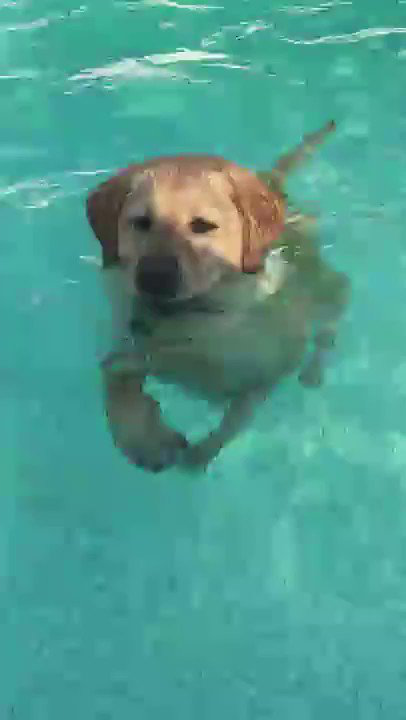

In [87]:
# Get image of dog(s) in tweet
url = df_clean.query('favorite_count == {}'.format(max_likes)).jpg_url.item()
r = requests.get(url)

Image.open(BytesIO(r.content))

#### 4. What is the average likes for dog stages?

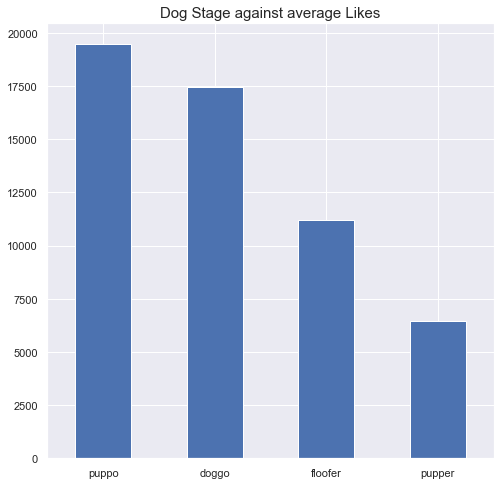

In [88]:

df_clean.groupby('dog_stage')['favorite_count'].mean().sort_values(ascending=False).plot(kind = 'bar',  rot=0, figsize=(8,8));
plt.title('Dog Stage against average Likes', fontsize=15)
plt.xlabel('');

On average, Puppos get more tweet likes.

####  5. Dog(s) with the highest rating?

In [89]:
# Assign tweets with highest calculated ratings to max_rating
max_rating = df_clean.rating.max()

df_clean.query('rating == {}'.format(max_rating))

,tweet_id,timestamp,tweet_source,text,expanded_urls,name,dog_stage,rating,raw_rating,retweet_count,favorite_count,jpg_url,img_num,breed,confidence
312,810984652412424192,2016-12-19 23:06:23+00:00,iphone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",Sam,NaN,3,24/7,1328,5039,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,Golden retriever,0.036708
1045,680494726643068929,2015-12-25 21:06:00+00:00,iphone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,NaN,NaN,3,26/10,438,1573,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1,Kuvasz,0.111622
1515,778027034220126208,2016-09-20 00:24:34+00:00,iphone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,Sophie,pupper,3,27/10,1490,6184,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,Clumber,0.015950


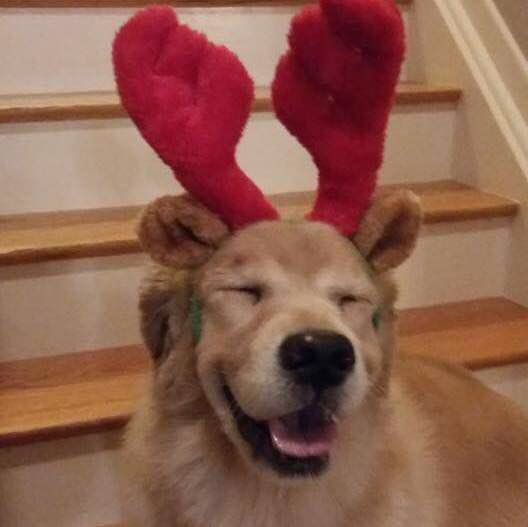

In [90]:
# URL of such tweets
url = df_clean.query('rating == {}'.format(max_rating)).jpg_url.to_list()

r1 = requests.get(url[0])
r2 = requests.get(url[1])
r3 = requests.get(url[2])

# Open their pictures
Image.open(BytesIO(r1.content))

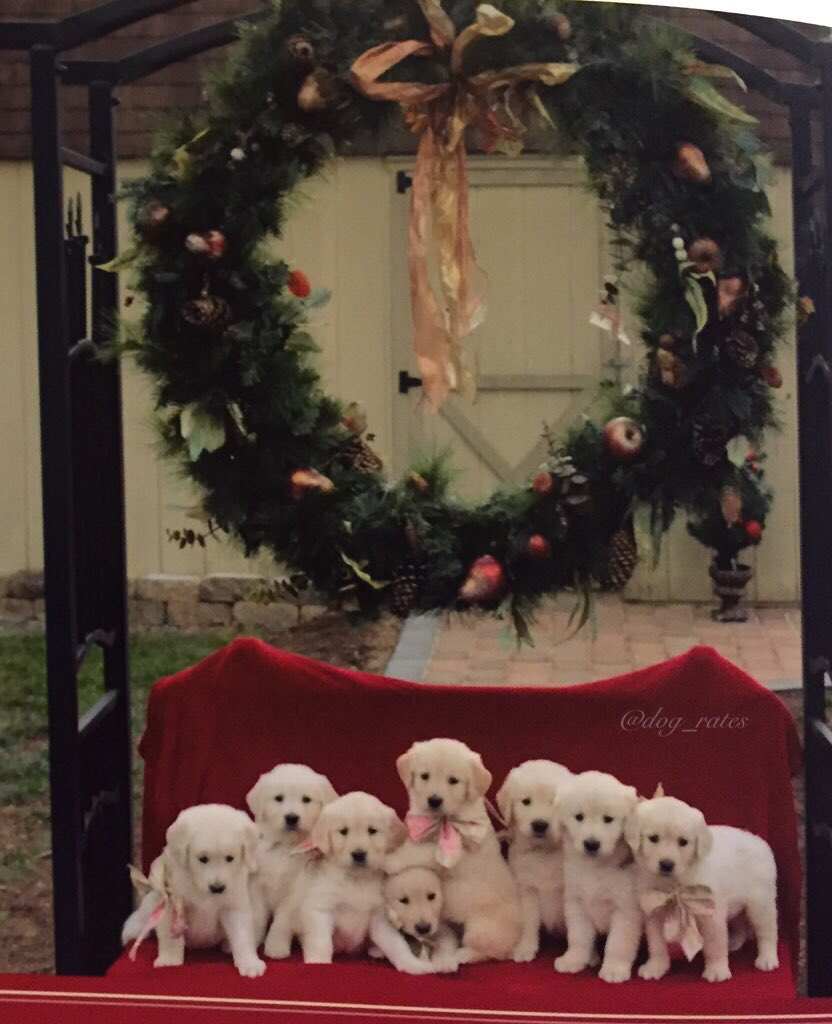

In [91]:
Image.open(BytesIO(r2.content))

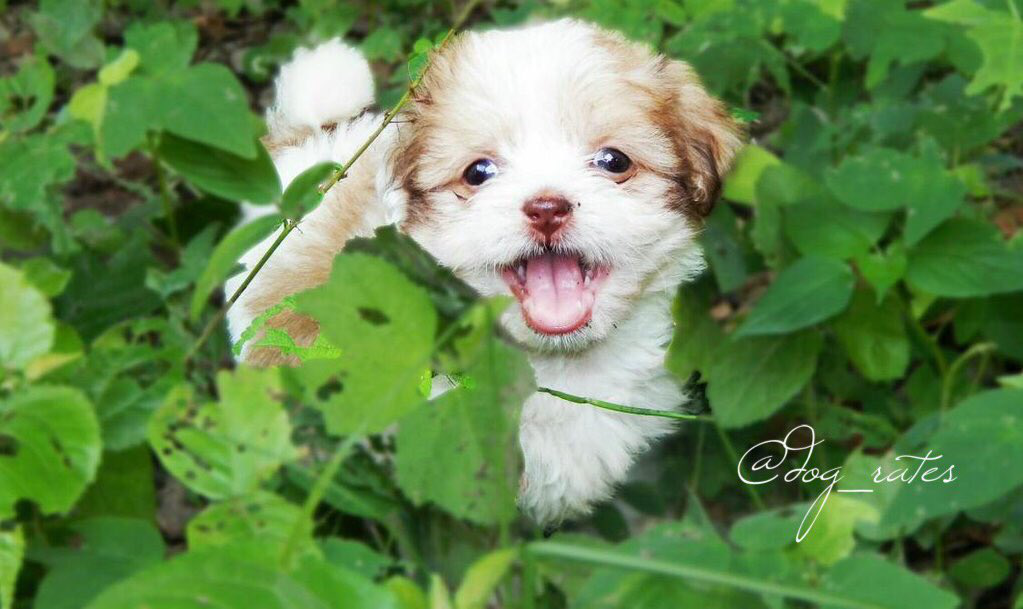

In [92]:
Image.open(BytesIO(r3.content))

#### 6. What is the most used tweet source?

In [93]:
df_clean.tweet_source.value_counts()

iphone                1648
twitter web client      22
tweetdeck                8
Name: tweet_source, dtype: int64

####  7. Most liked dog breeds

In [94]:
df_clean.groupby('breed').sum().sort_values(by = 'favorite_count', ascending = False).head(10)

,rating,retweet_count,favorite_count,img_num,confidence
breed,,,,,
Golden retriever,159,475396,1683384,201,17.470215
Labrador retriever,105,312301,1036514,124,14.235984
Pembroke,93,235959,903248,119,13.365032
Chihuahua,88,210051,667314,112,10.091322
French bulldog,30,131691,524721,35,2.900188
Samoyed,41,155418,480653,48,4.386557
Chow,48,106755,388434,62,5.521922
Cocker spaniel,30,118294,351164,37,4.286072
Pug,61,94035,324427,77,5.288428


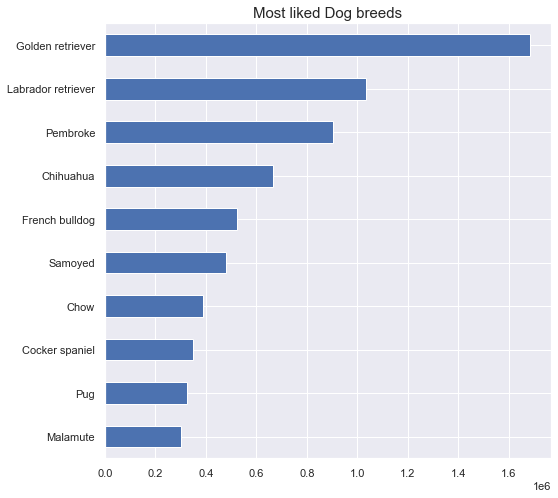

In [95]:
df_clean.groupby('breed').sum().favorite_count.sort_values(ascending = False).head(10).sort_values(ascending= True).plot(kind = 'barh',  rot=0, figsize=(8,8));
plt.title('Most liked Dog breeds', fontsize=15)
plt.xlabel('');
plt.ylabel('');

### Visualization

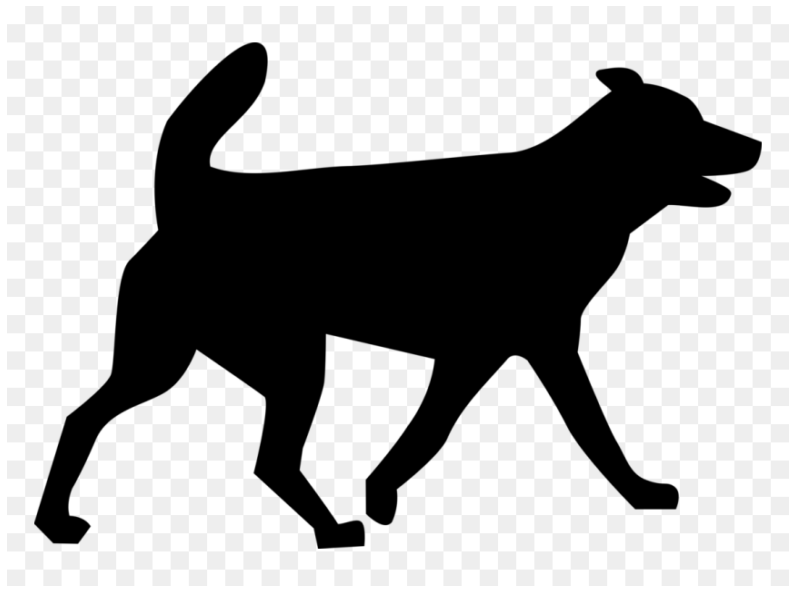

In [96]:
# Import dog silhoutte
url = 'https://www.dlf.pt/dfpng/middlepng/57-578964_silhouette-transparent-background-dog-clipart-png-png-download.png'
r = requests.get(url)
folder_name = 'C:/Users/Zion/Documents/Udacity_Wrangling'

# Download image for wordcloud
i = Image.open(BytesIO(r.content))
i.save(folder_name + "/" + 'dog_clipart' + '.' + 'png')

# Load image for wordcloud
image = np.array(Image.open('dog_clipart.png'))

fig = plt.figure() # Instantiate the figure object
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(image, cmap=plt.cm.gray, interpolation='bilinear') # Display data as an image
plt.axis('off') # Remove axis
plt.show() # Display image

In [97]:
# Create function to generate the blue colour for the Word CLoud

def blue_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(210, 100%%, %d%%)" % random.randint(50, 70)

In [98]:
# Extract all breed into one long string separated by space
breeds_long_string = df_clean['breed'].replace(" ", "_").tolist()
breeds_long_string = " ".join(breeds_long_string)

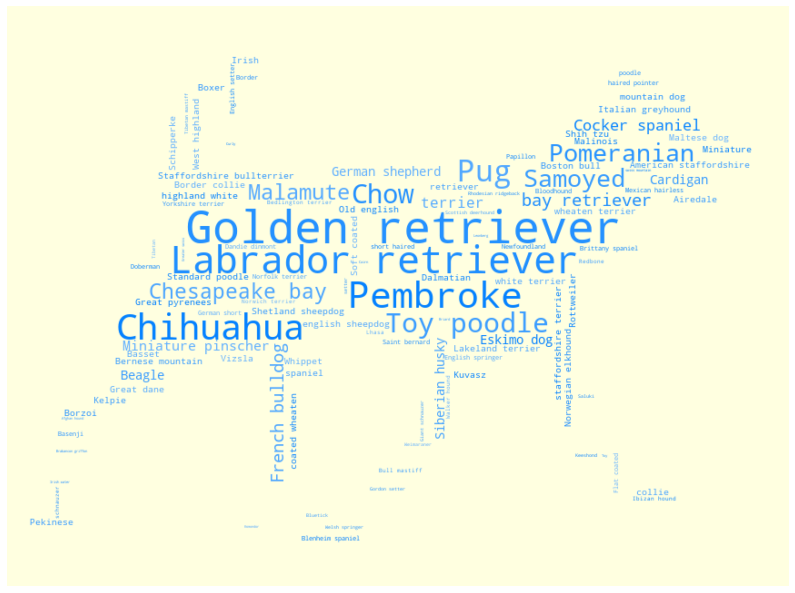

In [99]:
# Instantiate the Twitter word cloud object
wc = WordCloud(mode='RGBA',background_color='lightyellow', max_words=1500, mask=image)

# generate the word cloud
wc.generate(breeds_long_string)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14)  # set width
fig.set_figheight(18)  # set height

plt.imshow(wc.recolor(color_func=blue_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

In [100]:
# Save to a png file
wc.to_file("breed_wordcloud.png")